#Definitions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

legs = 8
b_acc = 55.3333
b_stdev = 23.5106

def conf(stdev, level=0.999, trials=100):
    if level==0.95:
        z = 1.960
    elif level==0.99:
        z=2.576
    elif level==0.999:
        z=3.291
    return z*stdev/math.sqrt(trials)



def plot(x,y,title,acc,stdev,b_acc=b_acc,b_stdev=b_stdev):
    ax[x,y].title.set_text(title)
    if acc!=0:
        ax[x,y].bar(["noise",title[:2]], [b_acc,acc], yerr=[conf(b_stdev), conf(stdev)], 
                    capsize=legs, color=["slategray","crimson"])

def batch_plot(labels, accs, stdevs, b_acc,b_stdev):
    for row in range(np.shape(labels)[0]):
        for column in range(np.shape(labels)[1]):
            plot(row,column,labels[row,column],accs[row,column],stdevs[row,column])


# Graphs

## m12ci

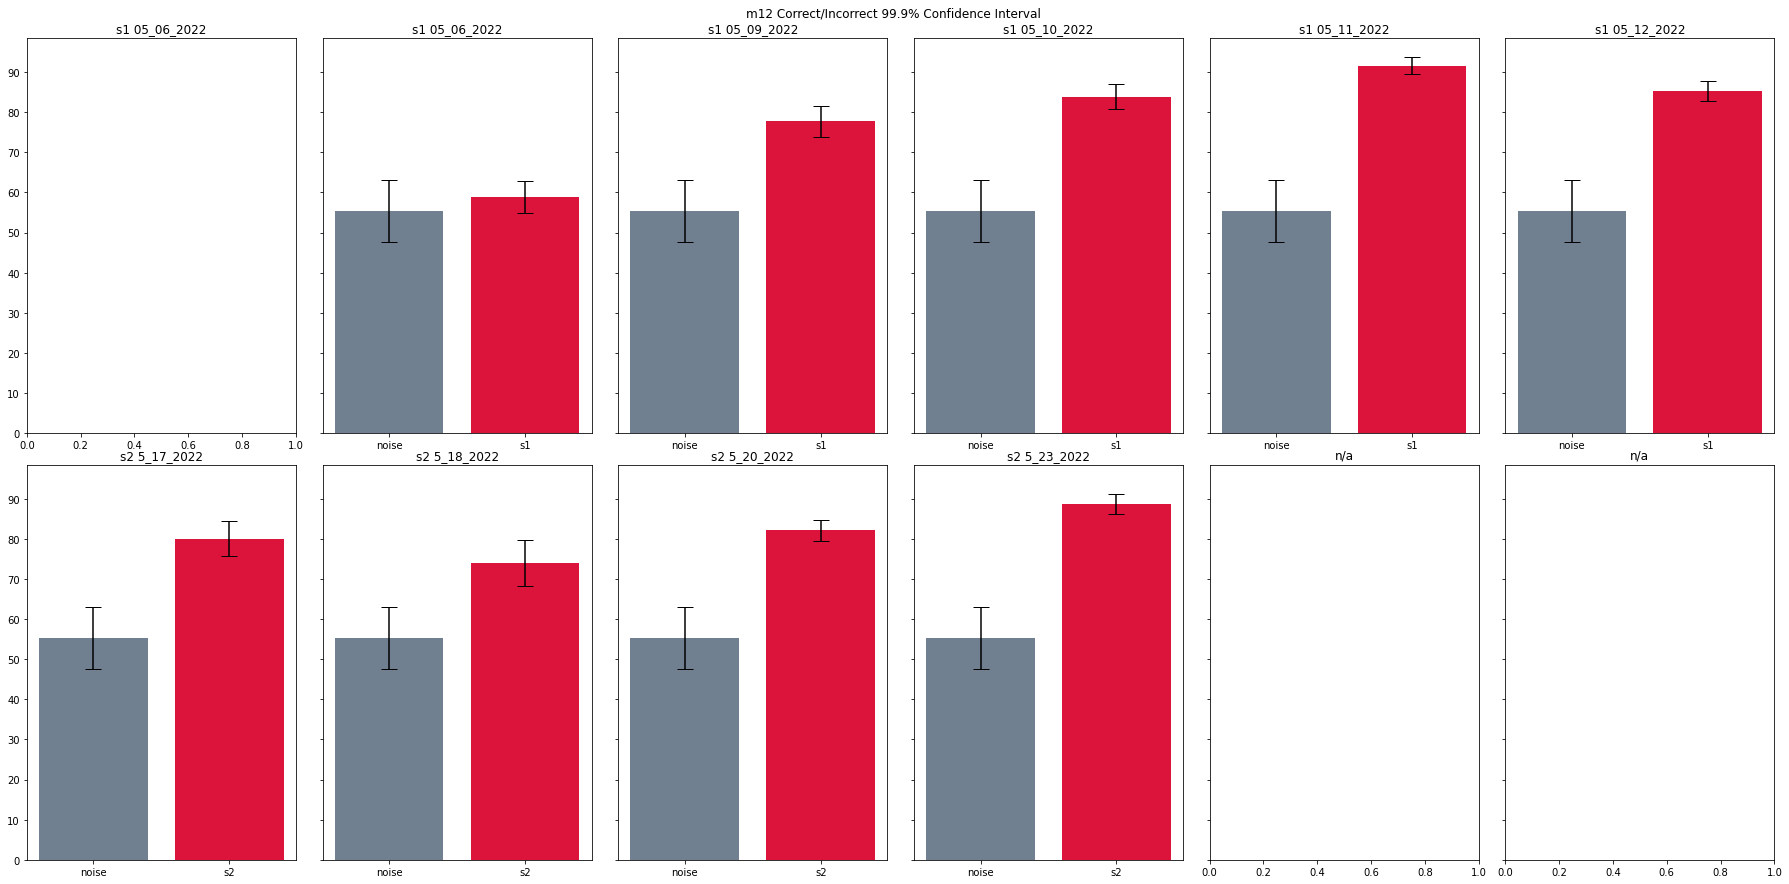

In [4]:
#m12ci
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(25,12), sharey=True)
fig.suptitle("m12 Correct/Incorrect 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
plt.yticks(np.arange(0,110,10))

plot(0,0,"s1 05_06_2022",0,0)
plot(0,1,"s1 05_06_2022",58.8889,11.8399)
plot(0,2,"s1 05_09_2022",77.7059,11.6471)
plot(0,3,"s1 05_10_2022",83.9091,9.4339)
plot(0,4,"s1 05_11_2022",91.6250,6.3567)
plot(0,5,"s1 05_12_2022",85.3636,7.5825)

plot(1,0, "s2 5_17_2022",80.0769,13.1020)
plot(1,1, "s2 5_18_2022",74.0000,17.693)
plot(1,2, "s2 5_20_2022",82.0833,7.717)
plot(1,3, "s2 5_23_2022",88.6667,7.2953)
plot(1,4, "n/a",0,0)
plot(1,5, "n/a",0,0)

<ErrorbarContainer object of 3 artists>

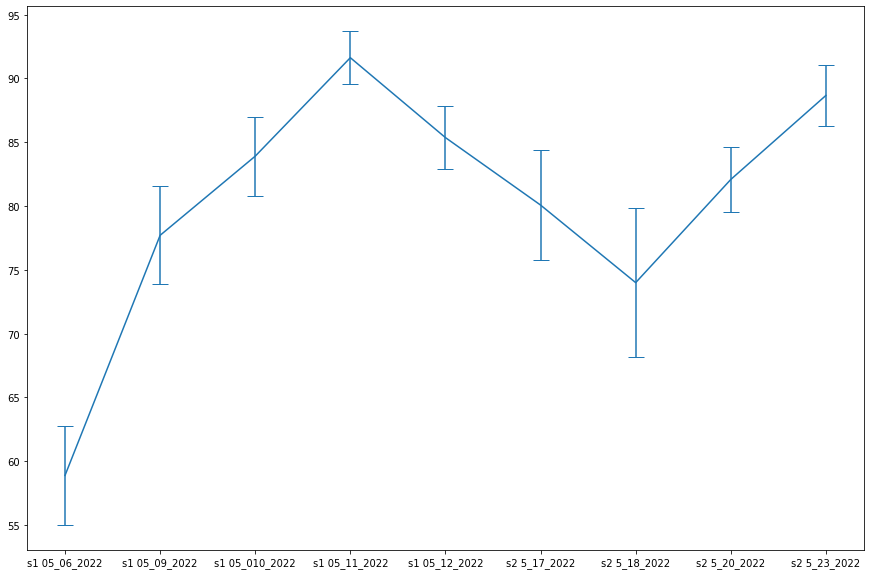

In [2]:
trials = ["s1 05_06_2022","s1 05_09_2022","s1 05_010_2022",
          "s1 05_11_2022","s1 05_12_2022","s2 5_17_2022","s2 5_18_2022",
          "s2 5_20_2022","s2 5_23_2022"]
accs = [58.8889,77.7059,83.9091,91.6250,85.3636,80.0769,74.0000,82.0833,88.6667]
stdevs = [11.8399,11.6471,9.4339,6.3567,7.5825,13.1020,17.693,7.717,7.2953]
confs = np.vectorize(conf)
errs = confs(stdevs)

plt.figure(figsize=(15,10))
plt.errorbar(trials, accs, yerr=errs,capsize=legs)

## m12lr

In [ ]:
#m12lr
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(25,12), sharey=True)
fig.suptitle("m12 Correct/Incorrect 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
plt.yticks(np.arange(0,110,10))

plot(0,0,"s1 05_06_2022",0,0)
plot(0,1,"s1 05_06_2022",58.8889,11.8399)
plot(0,2,"s1 05_09_2022",77.7059,11.6471)
plot(0,3,"s1 05_10_2022",83.9091,9.4339)
plot(0,4,"s1 05_11_2022",91.6250,6.3567)
plot(0,5,"s1 05_12_2022",85.3636,7.5825)

plot(1,0, "s2 5_17_2022",80.0769,13.1020)
plot(1,1, "s2 5_18_2022",74.0000,17.693)
plot(1,2, "s2 5_20_2022",82.0833,7.717)
plot(1,3, "s2 5_23_2022",88.6667,7.2953)
plot(1,4, "n/a",0,0)
plot(1,5, "n/a",0,0)